In [1]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing dataset
df_cars = pd.read_csv("./CarPrice_Assignment.csv")

In [3]:
# checking dataset
print(df_cars.shape)
print(df_cars.info())
df_cars.head()

(205, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
pea

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Dropping car_ID field since it is just unique ID of each record
df_cars.drop(['car_ID'],axis=1,inplace=True)
df_cars.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# checking duplicate records
df_cars.loc[df_cars.duplicated()]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


### <font color=blue>No duplicate records</font>

In [6]:
# checking NULL values
df_cars.isnull().sum(axis=0)

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### <font color=blue>No NULL values</font>

In [7]:
df_cars.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Extracting Manufacturer name from CarName

In [8]:
carCompany = df_cars['CarName'].str.split(" ", n = 1, expand = True)[0]
#carCompany = df_cars['CarName'].apply(lambda x : x.split(' ')[0])
df_cars.insert(3,'carCompany',carCompany)
df_cars.drop(['CarName'],axis=1,inplace=True)
df_cars.head()

,symboling,fueltype,carCompany,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


###### Checking Car Company field

In [9]:
df_cars['carCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

###### There are spelling mistakes in Car Company as below
    maxda      --> mazda
    Nissan     --> nissan
    porcshce   --> porsche
    toyouta    --> toyota
    vokswagen  --> volkswagen
    vw         --> volkswagen

In [10]:
# converting to lower case - this will resolve Nissan issue
df_cars['carCompany'] = df_cars['carCompany'].str.lower()

# updating correct car company
df_cars['carCompany'].replace('maxda','mazda',inplace = True)
df_cars['carCompany'].replace('porcshce','porsche',inplace = True)
df_cars['carCompany'].replace('toyouta','toyota',inplace = True)
df_cars['carCompany'].replace('vokswagen','volkswagen',inplace = True)
df_cars['carCompany'].replace('vw','volkswagen',inplace = True)

In [11]:
df_cars['carCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

###### ----Car Company field sorted

### Data Visualization

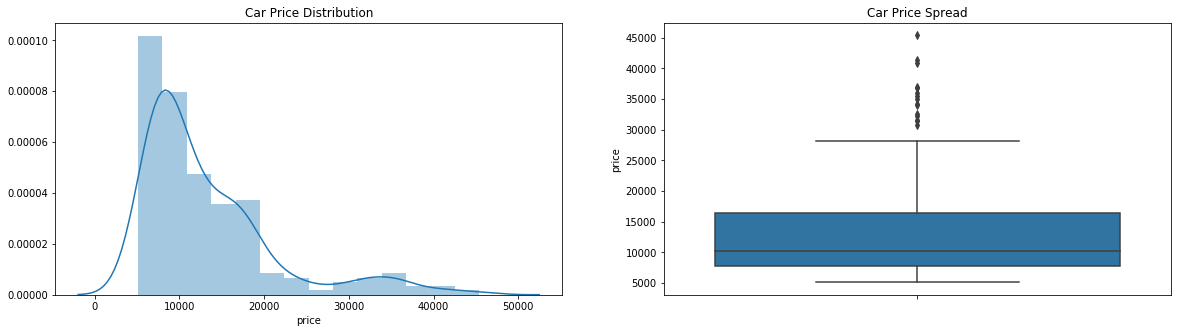

In [12]:
# Analyzing Car price
plt.figure(figsize = (20,5))

plt.subplot(121)
plt.title('Car Price Distribution')
#df_cars['price'].plot('bar')
sns.distplot(df_cars['price'])

plt.subplot(122)
plt.title('Car Price Spread')
sns.boxplot(y=df_cars['price'])

plt.show()

In [13]:
df_cars['price'].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
90%      22563.000000
95%      32472.400000
99%      40802.720000
max      45400.000000
Name: price, dtype: float64

### <font color=blue>Car Price distribution is right skewed with desity between 5,000 and 19,000</font>
### <font color=blue>There is significant difference between mean and median, mean > median</font>

### Visualizing categorical variables
1. symboling
2. carCompany
3. fueltype
4. aspiration
5. doornumber
6. carbody
7. drivewheel
8. enginelocation
9. enginetype
10. cylindernumber
11. fuelsystem

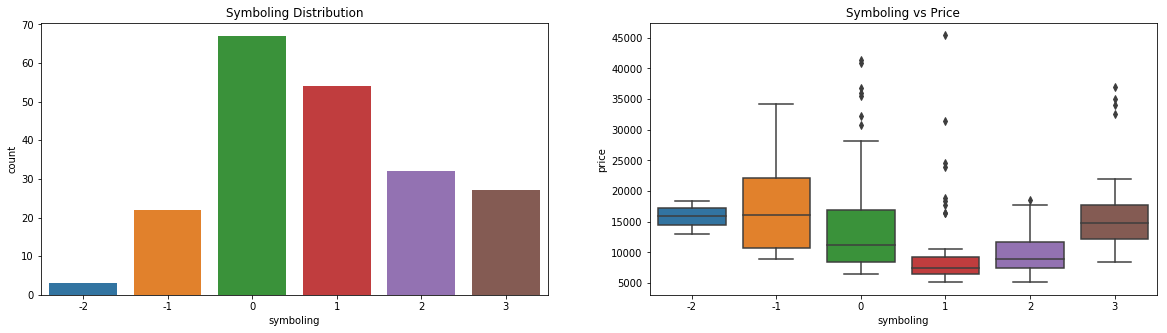

In [14]:
# Analyzing symboling
plt.figure(figsize = (20,5))

plt.subplot(121)
plt.title('Symboling Distribution')
#df_cars['symboling'].value_counts().plot('bar')
#sns.distplot(df_cars['symboling'])
sns.countplot(df_cars['symboling'])

plt.subplot(122)
plt.title('Symboling vs Price')
sns.boxplot(y=df_cars['price'],x=df_cars['symboling'])

plt.show()

### <font color=blue>Categorical Variable - Symboling</font>
    Majority of cars belongs to symboling - 0 & 1
    Price of cars reduces from symboling -1 to 1 and than increases from 1 to 3

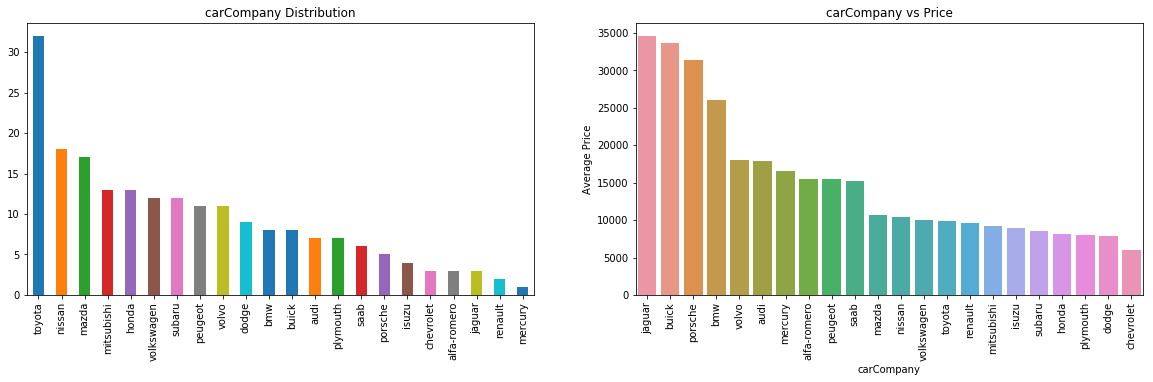

In [15]:
# Analyzing carCompany
plt.figure(figsize = (20,5))

plt.subplot(121)
plt.title('carCompany Distribution')
df_cars['carCompany'].value_counts().plot.bar()
#sns.countplot(df_cars['carCompany'])
plt.xticks(rotation = 90)

plt.subplot(122)
plt.title('carCompany vs Price')
df_carCompany_Price = pd.DataFrame(df_cars.groupby(['carCompany'])['price'].mean()).sort_values(by = 'price', ascending = False)
sns.barplot(df_carCompany_Price.index,df_carCompany_Price['price'])
plt.xticks(rotation = 90)
plt.ylabel('Average Price')

plt.show()

### <font color=blue>Categorical Variable - carCompany</font>
    Majority of cars favoured by customers are from Car Company - Toyota
    Cars with high average price -
        1. Jaguar
        2. Buick
        3. Porsche
        4. BMW
    Cars with medium average price -
        1. Volvo
        2. Audi
        3. Mercury
        4. Alfa-romero
        5. Peugeot
        6. Saab
    Cars with low average price - 
        1. Mazda
        2. Nissan
        3. Volkswagen
        4. Toyota
        5. Renault
        6. Mitsubishi
        7. iSuzu
        8. Honda
        9. Plymouth
        10. Dodge
        11. Chevrolet

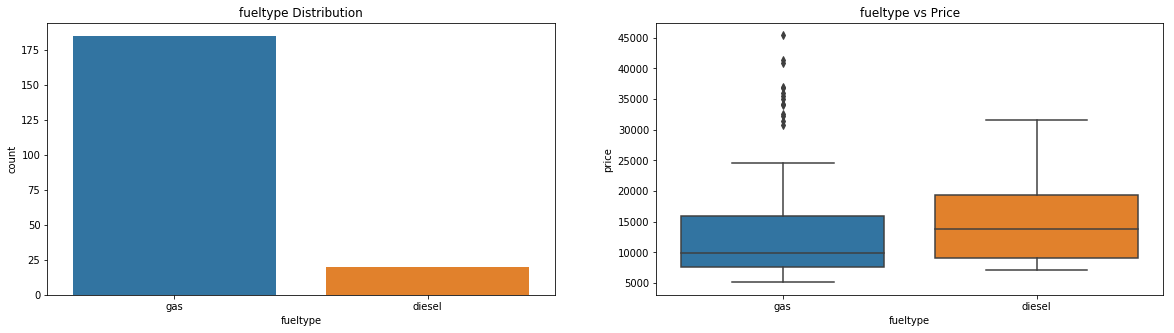

In [16]:
# Analyzing fueltype
plt.figure(figsize = (20,5))

plt.subplot(121)
plt.title('fueltype Distribution')
sns.countplot(df_cars['fueltype'])

plt.subplot(122)
plt.title('fueltype vs Price')
sns.boxplot(y=df_cars['price'],x=df_cars['fueltype'])

plt.show()

### <font color=blue>Categorical Variable - fueltype</font>
    Majority of cars have fueltype as gas
    Price of cars with fueltype as diesel is more than having fueltype as gas

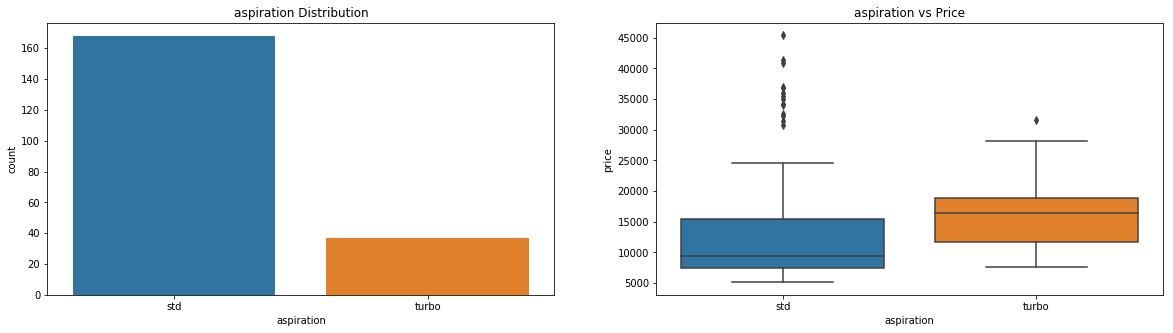

In [17]:
# Analyzing aspiration
plt.figure(figsize = (20,5))

plt.subplot(121)
plt.title('aspiration Distribution')
sns.countplot(df_cars['aspiration'])

plt.subplot(122)
plt.title('aspiration vs Price')
sns.boxplot(y=df_cars['price'],x=df_cars['aspiration'])

plt.show()

### <font color=blue>Categorical Variable - aspiration</font>
    Majority of cars have aspiration as std
    Price of cars with aspiration as turbo is more than having aspiration as std

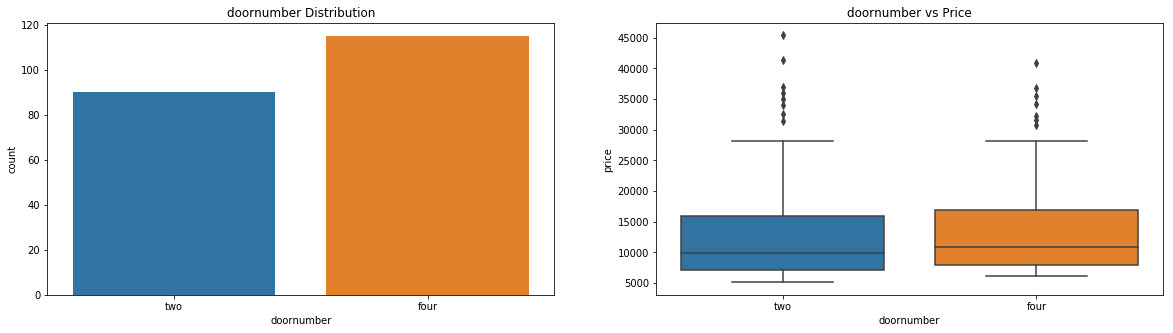

In [18]:
# Analyzing doornumber
plt.figure(figsize = (20,5))

plt.subplot(121)
plt.title('doornumber Distribution')
sns.countplot(df_cars['doornumber'])

plt.subplot(122)
plt.title('doornumber vs Price')
sns.boxplot(y=df_cars['price'],x=df_cars['doornumber'])

plt.show()

### <font color=blue>Categorical Variable - doornumber</font>
    Cars having four doors is preferred slightly more than cars with two doors.
    Price range of cars with four and two doors are comparable.

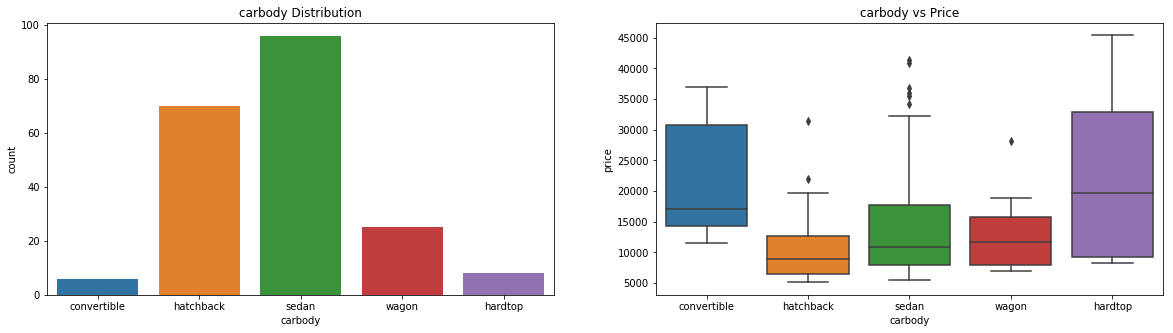

In [19]:
# Analyzing carbody
plt.figure(figsize = (20,5))

plt.subplot(121)
plt.title('carbody Distribution')
sns.countplot(df_cars['carbody'])

plt.subplot(122)
plt.title('carbody vs Price')
sns.boxplot(y=df_cars['price'],x=df_cars['carbody'])

plt.show()

### <font color=blue>Categorical Variable - carbody</font>
    Majority of cars have carbody as sedan carbody  and hatchback
    Cars with carbody as convertible and hardtop have broad price range

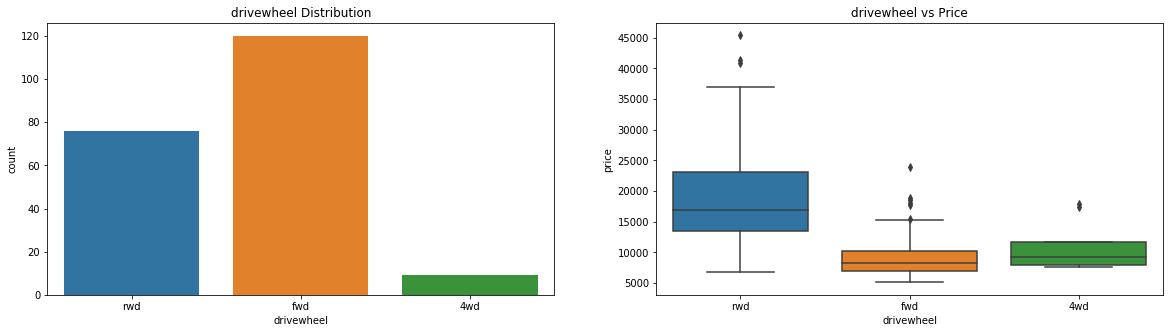

In [20]:
# Analyzing drivewheel
plt.figure(figsize = (20,5))

plt.subplot(121)
plt.title('drivewheel Distribution')
sns.countplot(df_cars['drivewheel'])

plt.subplot(122)
plt.title('drivewheel vs Price')
sns.boxplot(y=df_cars['price'],x=df_cars['drivewheel'])

plt.show()

### <font color=blue>Categorical Variable - drivewheel</font>
    Majority of cars are fwd followed by rwd
    Price range of rwd is wider than other two

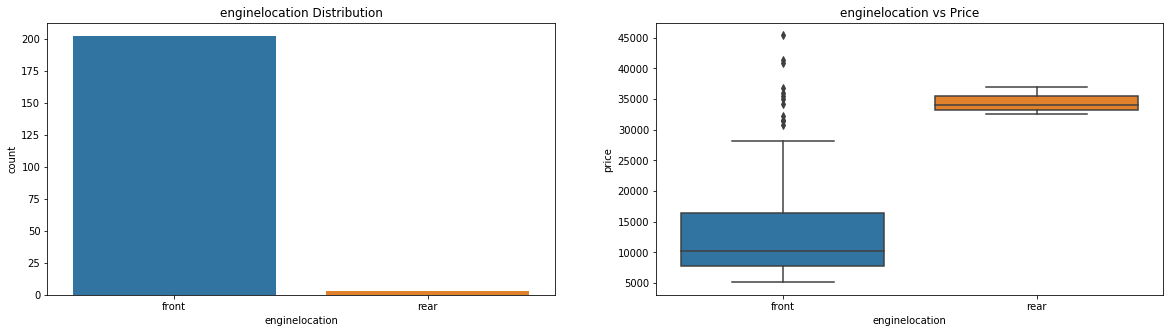

In [21]:
# Analyzing enginelocation
plt.figure(figsize = (20,5))

plt.subplot(121)
plt.title('enginelocation Distribution')
sns.countplot(df_cars['enginelocation'])

plt.subplot(122)
plt.title('enginelocation vs Price')
sns.boxplot(y=df_cars['price'],x=df_cars['enginelocation'])

plt.show()

### <font color=blue>Categorical Variable - enginelocation</font>
    Majority of cars have engine location as front, only fraction of cars have engine location as rear
    Price range of cars with rear engine location is higher than cars with front engine location
    But this category has very few datapoints to make any inference.

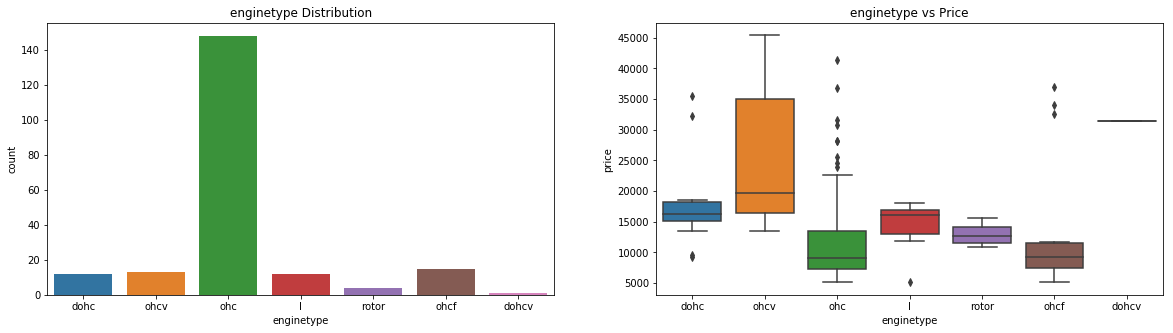

In [22]:
# Analyzing enginetype
plt.figure(figsize = (20,5))

plt.subplot(121)
plt.title('enginetype Distribution')
sns.countplot(df_cars['enginetype'])

plt.subplot(122)
plt.title('enginetype vs Price')
sns.boxplot(y=df_cars['price'],x=df_cars['enginetype'])

plt.show()

### <font color=blue>Categorical Variable - enginetype</font>
    Majority of cars have ohc enginetype

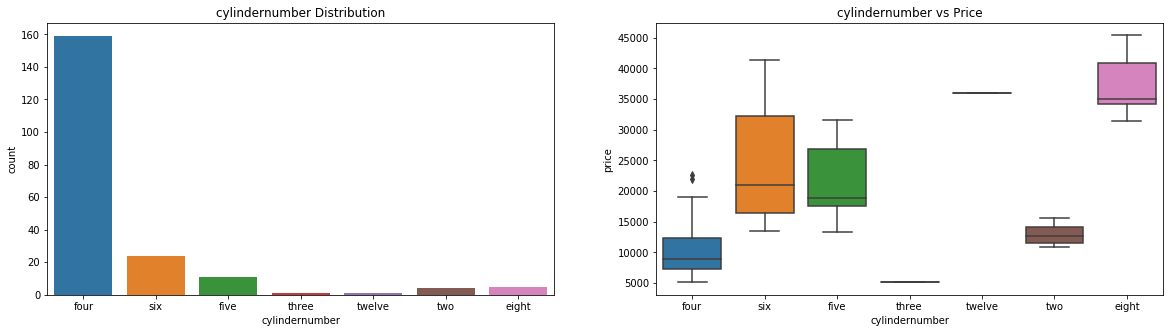

In [23]:
# Analyzing cylindernumber
plt.figure(figsize = (20,5))

plt.subplot(121)
plt.title('cylindernumber Distribution')
sns.countplot(df_cars['cylindernumber'])

plt.subplot(122)
plt.title('cylindernumber vs Price')
sns.boxplot(y=df_cars['price'],x=df_cars['cylindernumber'])

plt.show()

### <font color=blue>Categorical Variable - cylindernumber</font>
    Majority of cars have four cylindernumber

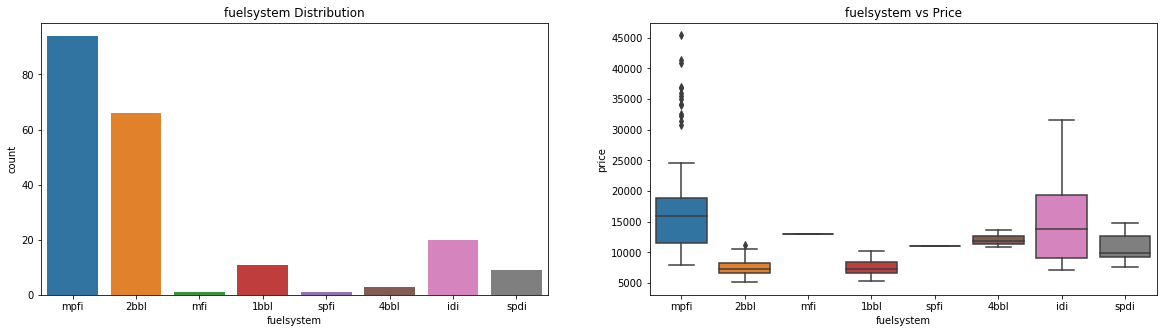

In [24]:
# Analyzing fuelsystem
plt.figure(figsize = (20,5))

plt.subplot(121)
plt.title('fuelsystem Distribution')
sns.countplot(df_cars['fuelsystem'])

plt.subplot(122)
plt.title('fuelsystem vs Price')
sns.boxplot(y=df_cars['price'],x=df_cars['fuelsystem'])

plt.show()

### <font color=blue>Categorical Variable - fuelsystem</font>
    Majority of cars have mpfi and 2bbl fuelsystem
    For other categories very few datapoints are availble to make an inference.

### Visualising numeric variables

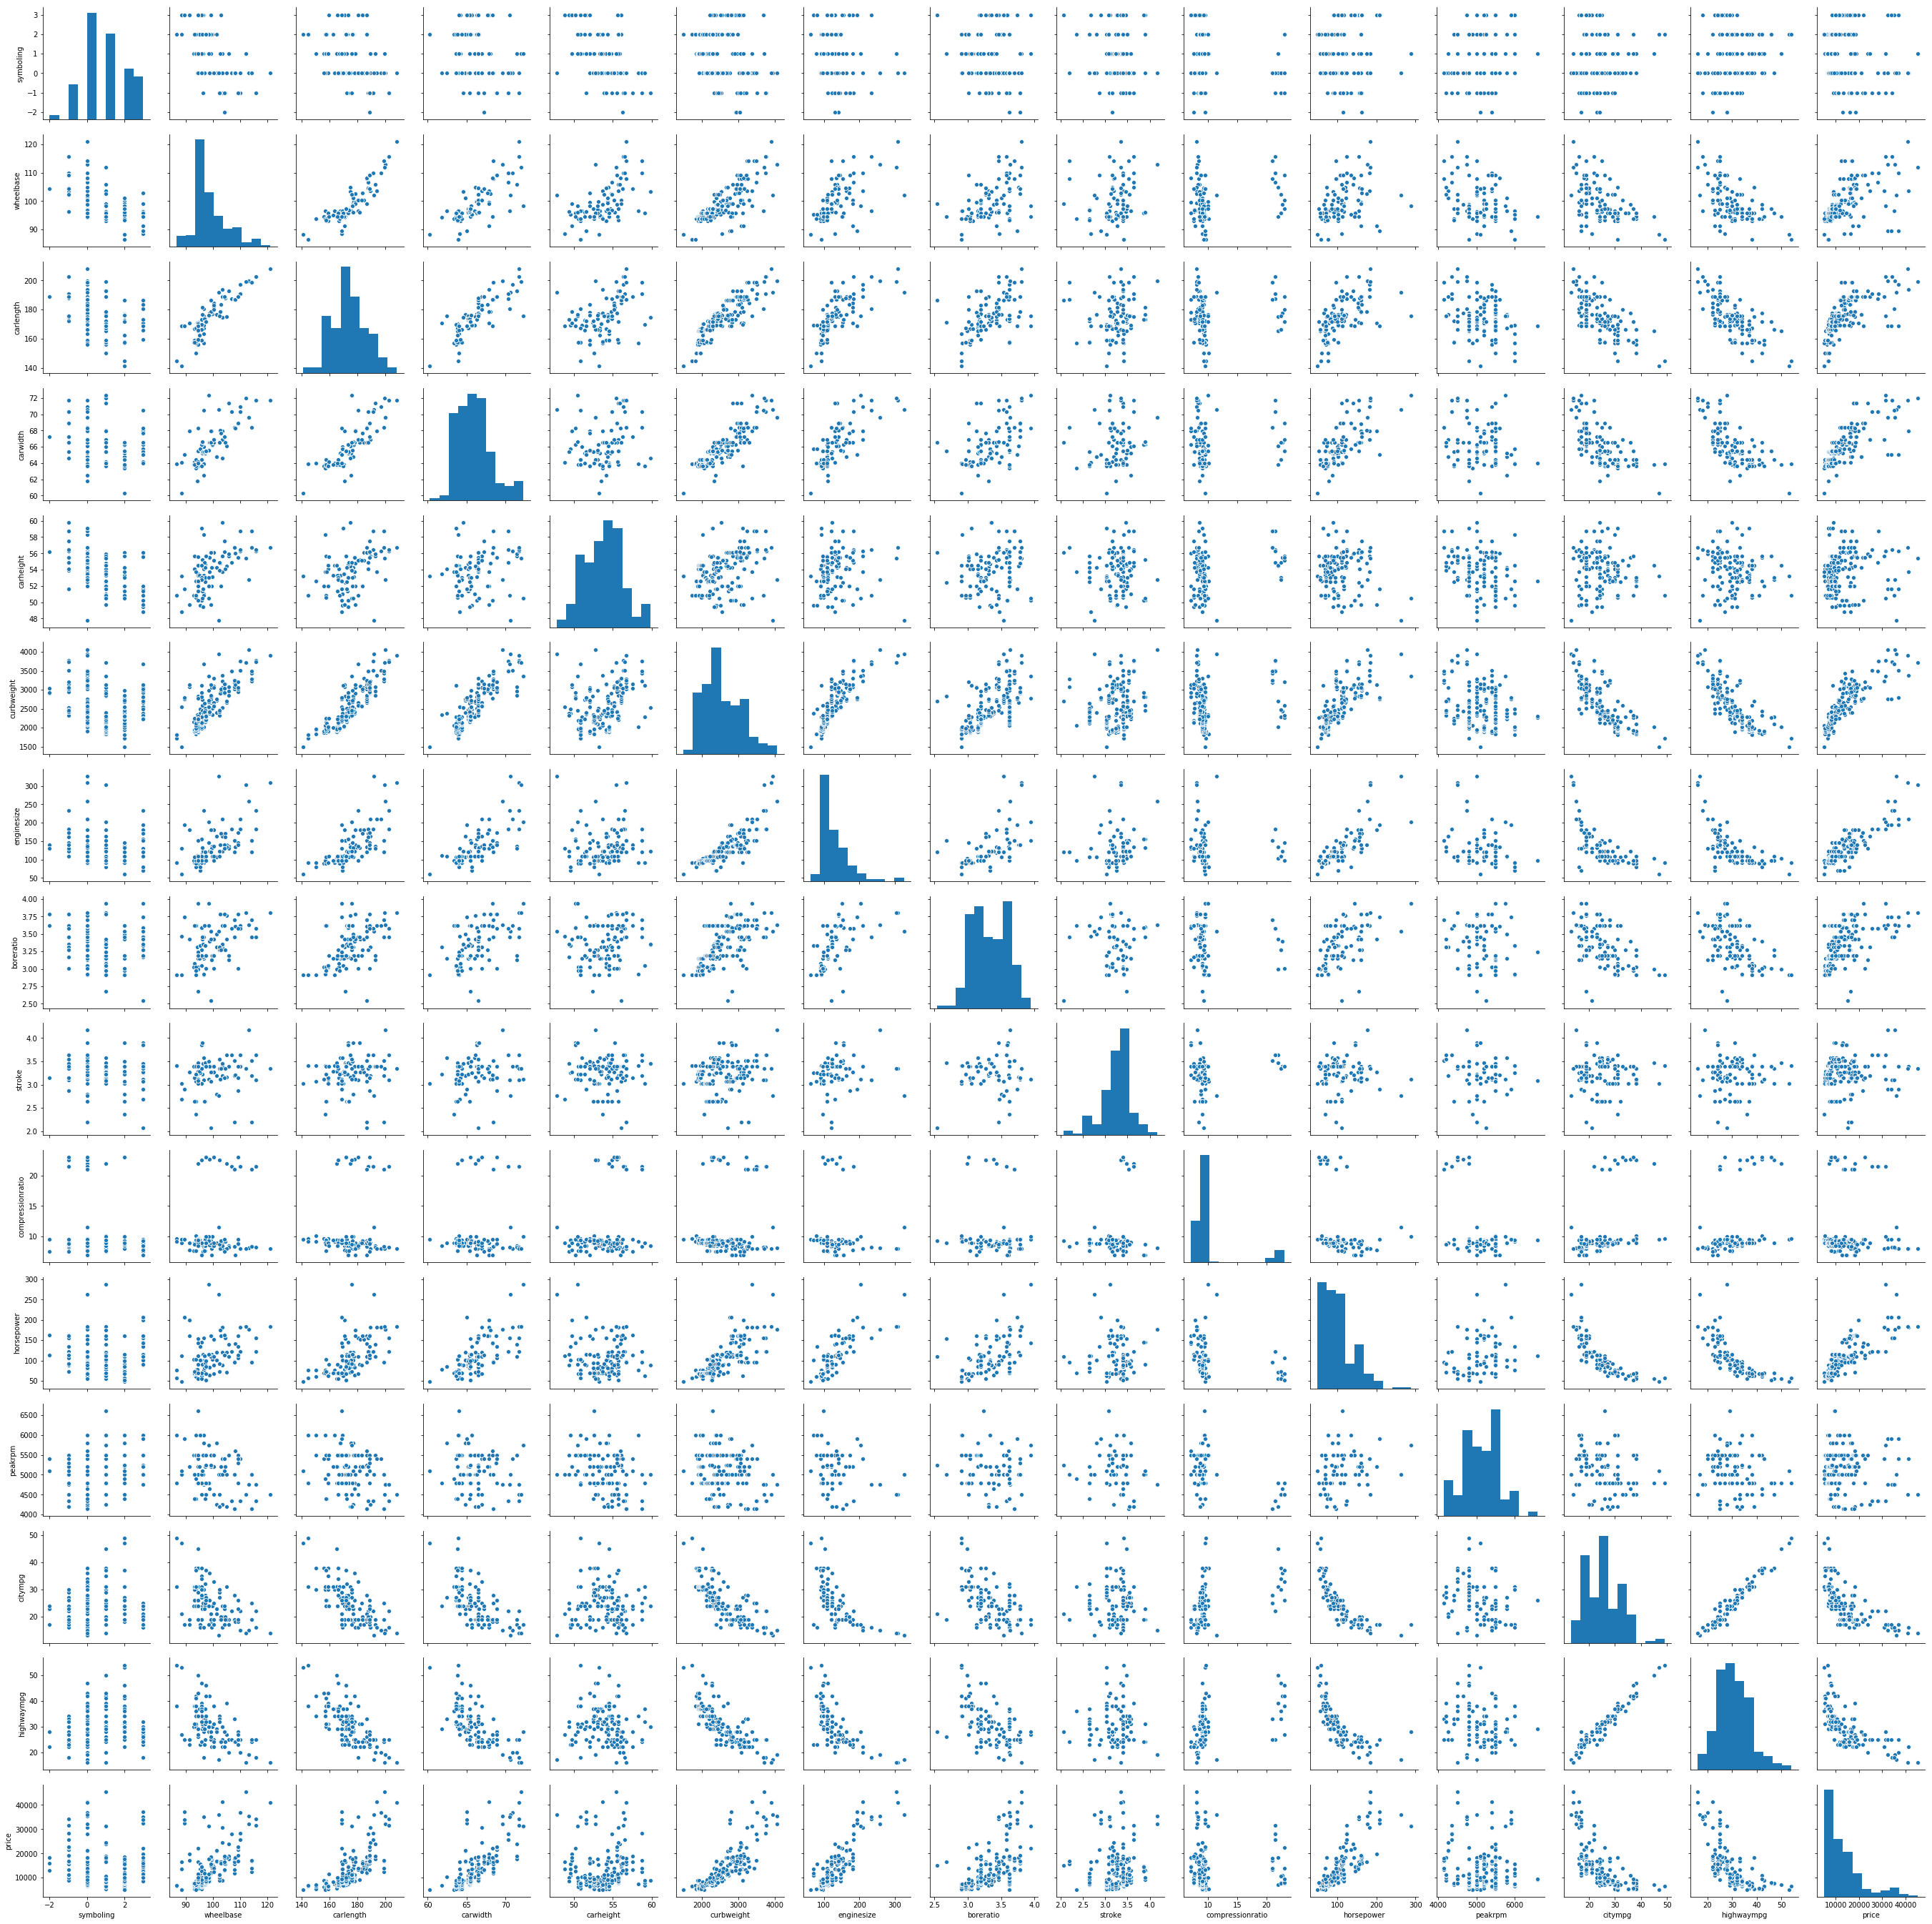

In [25]:
# pairplot numeric variables
sns.pairplot(df_cars)
plt.show()

### <font color=blue>Observation - Numerical Variables</font>
    Following variables show postive correlaion with price
        1. wheelbase
        2. carlength
        3. carwidth
        4. curbweight
        5. enginesize
        6. boreration
        7. horsepower
    
    Following variables show negative correlaion with price
        1. citympg
        2. highwaympg
    
    Following shows concentration around lower price range
        1. carheight
        2. stroke
        3. peakrpm 

    low compressionratio has high price range

### Deriving new feature - Mileage

In [26]:
Citympg_mean = df_cars['citympg'].mean()
Highwaympg_mean = df_cars['highwaympg'].mean()

In [27]:
# Creating Mileage using weighted mean
df_cars['Mileage'] = (round(Highwaympg_mean/(Citympg_mean+Highwaympg_mean),2)*df_cars['citympg']) + (round(Citympg_mean/(Citympg_mean+Highwaympg_mean),2)*df_cars['highwaympg'])

In [28]:
df_cars.head()

,symboling,fueltype,carCompany,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Mileage
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80


### Analysis Mileage vs price

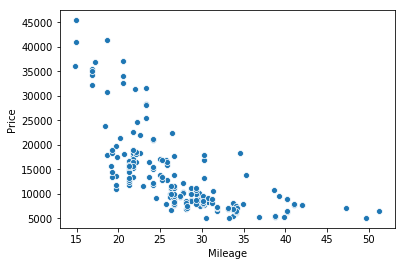

In [29]:
# Analysis citympg/highwaympg vs price with drivewheel
plt.figure()

sns.scatterplot(x=df_cars['Mileage'],y=df_cars['price'])
plt.xlabel('Mileage')
plt.ylabel('Price')

plt.show()

### <font color=blue>Observation</font>
    Price has negative correlation with mileage.

### Deriving new feature - PriceRange
    Car Company with price range 11000 or less with 'Low'
    Car Company with price range between 11000 and 20000 with 'Medium'
    Car Company with price range more than 20000 with 'High'

In [30]:
# using average price dataframe created earlier
df_carCompany_Price['PriceRange'] = 'Budget'
df_carCompany_Price.loc[df_carCompany_Price['price']>11000,'PriceRange'] = 'Medium'
df_carCompany_Price.loc[df_carCompany_Price['price']>20000,'PriceRange'] = 'High'

#merging with master dataset
df_cars = df_cars.merge(df_carCompany_Price['PriceRange'].reset_index(), how='left',on='carCompany')

In [31]:
df_cars.head()

,symboling,fueltype,carCompany,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Mileage,PriceRange
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70,Medium
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70,Medium
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15,Medium
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70,Medium
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80,Medium


In [32]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 27 columns):
symboling           205 non-null int64
fueltype            205 non-null object
carCompany          205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

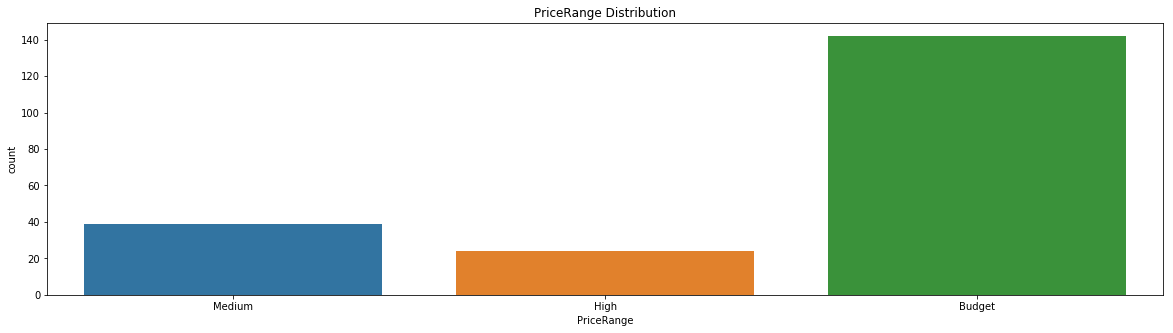

In [33]:
# Analyzing Price Range
plt.figure(figsize = (20,5))

plt.title('PriceRange Distribution')
sns.countplot(df_cars['PriceRange'])

plt.show()

### <font color=blue>Categorical Variable - PriceRange</font>
    Majority of cars are from Budget PriceRange

### Analysis drivewheel - Mileage

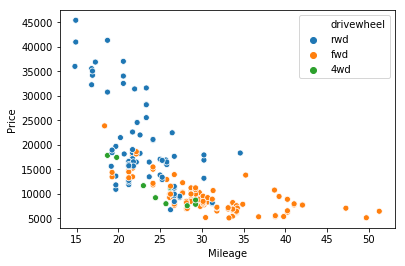

In [34]:
plt.figure()

sns.scatterplot(x=df_cars['Mileage'],y=df_cars['price'],hue=df_cars['drivewheel'])
plt.xlabel('Mileage')
plt.ylabel('Price')

plt.show()

### <font color=blue>Observation</font>
    fwd cars have high mileage and are low on price
    rwd cars have low mileage and high price range

### Analysis PriceRange - Mileage

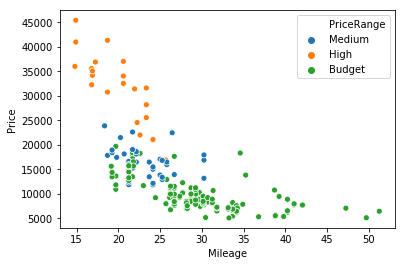

In [35]:
plt.figure()

sns.scatterplot(x=df_cars['Mileage'],y=df_cars['price'],hue=df_cars['PriceRange'])
plt.xlabel('Mileage')
plt.ylabel('Price')

plt.show()

### <font color=blue>Observation</font>
    Budget cars have better mileage than other cars.
    High Range cars have low mileage

### Analysis PriceRange - Horsepower

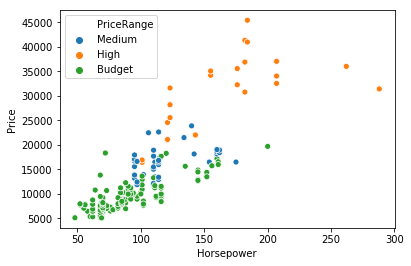

In [36]:
plt.figure()

sns.scatterplot(x=df_cars['horsepower'],y=df_cars['price'],hue=df_cars['PriceRange'])
plt.xlabel('Horsepower')
plt.ylabel('Price')

plt.show()

### <font color=blue>Observation</font>
    Budget cars have low horsepower
    High range cars have high horsepower

### Analysis fueltype - Mileage

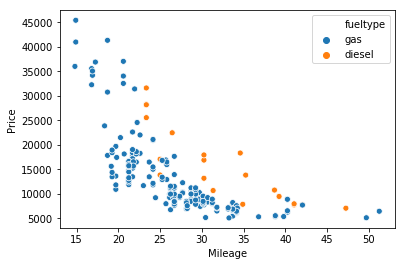

In [37]:
plt.figure()

sns.scatterplot(x=df_cars['Mileage'],y=df_cars['price'],hue=df_cars['fueltype'])
plt.xlabel('Mileage')
plt.ylabel('Price')

plt.show()

### <font color=blue>Observation</font>
    No such trend with fueltype

### Analysis fueltype - horsepower

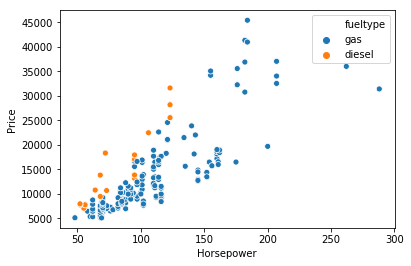

In [38]:
plt.figure()

sns.scatterplot(x=df_cars['horsepower'],y=df_cars['price'],hue=df_cars['fueltype'])
plt.xlabel('Horsepower')
plt.ylabel('Price')

plt.show()

### <font color=blue>Observation</font>
    High horsepower cars are gas type

### Correlation between variables

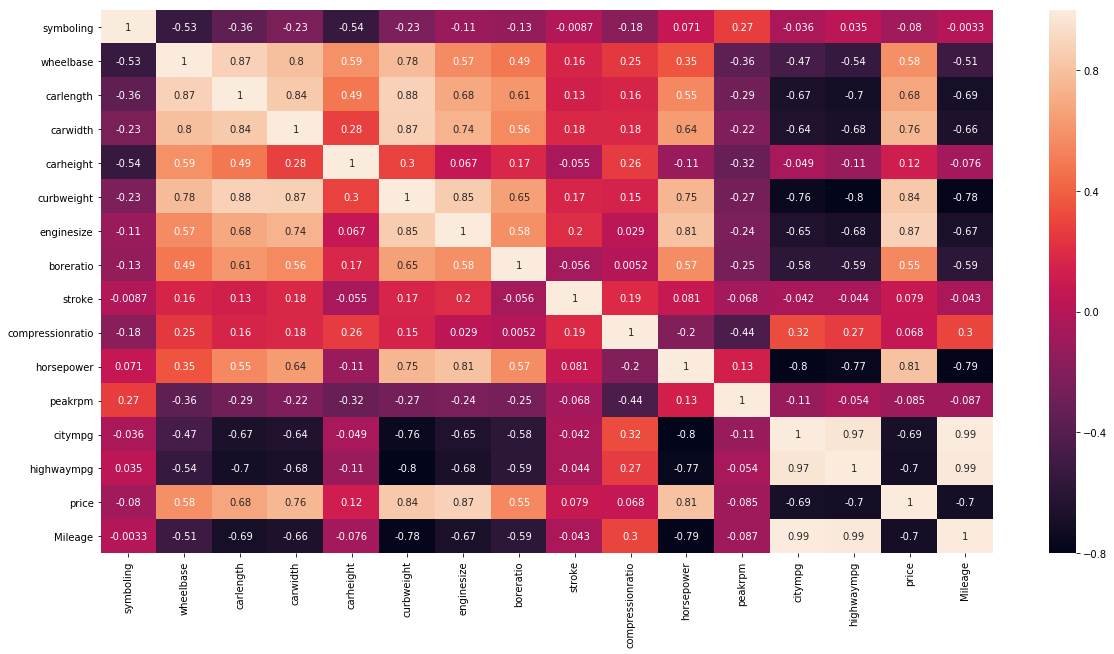

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(df_cars.corr(), annot=True)
plt.show()

### <font color=blue>Observation</font>
    High positive correlation (>=0.8)
        1. carlength - wheelbase
        2. carwidth - wheelbase
        3. carwidth - carlength
        4. curbweight - carlength
        5. curbweight - carwidth
        6. enginesize - curbweight
        7. horsepower - enginesize
        8. price - curbweight
        9. price - enginesize
        10. price - horsepower

    High negative correlation (<=-0.8)
        1. citympg - horsepower
        2. highwaympg - curbweight

### Dataframe for linear regression

In [40]:
# Dataframe for linear regression
df_cars_lr = df_cars.copy()

df_cars_lr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 27 columns):
symboling           205 non-null int64
fueltype            205 non-null object
carCompany          205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

### Encoding Categorical Variables

In [41]:
df_cars_lr['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [42]:
df_cars_lr['cylindernumber'] = df_cars_lr['cylindernumber'].map({'four':4,'six':6,'five':5,'three':3,'twelve':12,'two':2,'eight':8})

In [43]:
df_cars_lr['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [44]:
df_cars_lr['doornumber'] = df_cars_lr['doornumber'].map({'four':4,'two':2})

In [45]:
df_cars_lr.head()

,symboling,fueltype,carCompany,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Mileage,PriceRange
0,3,gas,alfa-romero,std,2,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70,Medium
1,3,gas,alfa-romero,std,2,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70,Medium
2,1,gas,alfa-romero,std,2,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15,Medium
3,2,gas,audi,std,4,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70,Medium
4,2,gas,audi,std,4,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80,Medium


### Dummy Variables

In [46]:
cat_unordered = list(df_cars_lr.select_dtypes(include='object').columns)

In [47]:
df_cars_lr = pd.concat([df_cars_lr, pd.get_dummies(df_cars_lr.loc[:,cat_unordered], prefix=cat_unordered, drop_first=True)], axis = 1)

In [48]:
df_cars_lr.drop(cat_unordered, axis = 1, inplace = True)

In [49]:
df_cars_lr.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,PriceRange_High,PriceRange_Medium
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,1,0,0,0,1
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,1,0,0,0,1
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,0,0,0,0,1,0,0,0,1
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,1,0,0,0,1
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,1,0,0,0,1


### Splitting the Data into Training and Testing Sets 

In [50]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df_cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [51]:
print(df_train.shape)
print(df_test.shape)

(143, 63)
(62, 63)


### Rescaling the features
Rescaling features using MinMax scaling

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [53]:
numeric_vars = ['symboling','doornumber','wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price','Mileage']

df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])

In [54]:
df_train.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,PriceRange_High,PriceRange_Medium
122,0.6,1.0,0.244828,0.426016,0.291667,0.265487,0.272692,0.2,0.139623,0.230159,...,0,1,0,0,0,0,0,0,0,0
125,1.0,0.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.2,0.339623,1.000000,...,0,0,0,0,0,1,0,0,1,0
166,0.6,0.0,0.272414,0.448780,0.308333,0.424779,0.314973,0.2,0.139623,0.444444,...,0,0,0,0,0,1,0,0,0,0
1,1.0,0.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.2,0.260377,0.626984,...,0,0,0,0,0,1,0,0,0,1
199,0.2,1.0,0.610345,0.775610,0.575000,0.858407,0.647401,0.2,0.260377,0.746032,...,0,0,0,0,0,1,0,0,0,1


In [55]:
df_train.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,PriceRange_High,PriceRange_Medium
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000
mean,0.559441,0.559441,0.411141,0.525476,0.461655,0.509004,0.407878,0.240559,0.241351,0.497946,...,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.118881,0.174825
std,0.239200,0.498199,0.205581,0.204848,0.184517,0.215378,0.211269,0.115818,0.154619,0.207140,...,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.324786,0.381153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.400000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.200000,0.135849,0.305556,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.600000,1.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.200000,0.184906,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
75%,0.600000,1.000000,0.503448,0.669919,0.550000,0.668142,0.559542,0.200000,0.301887,0.682540,...,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000


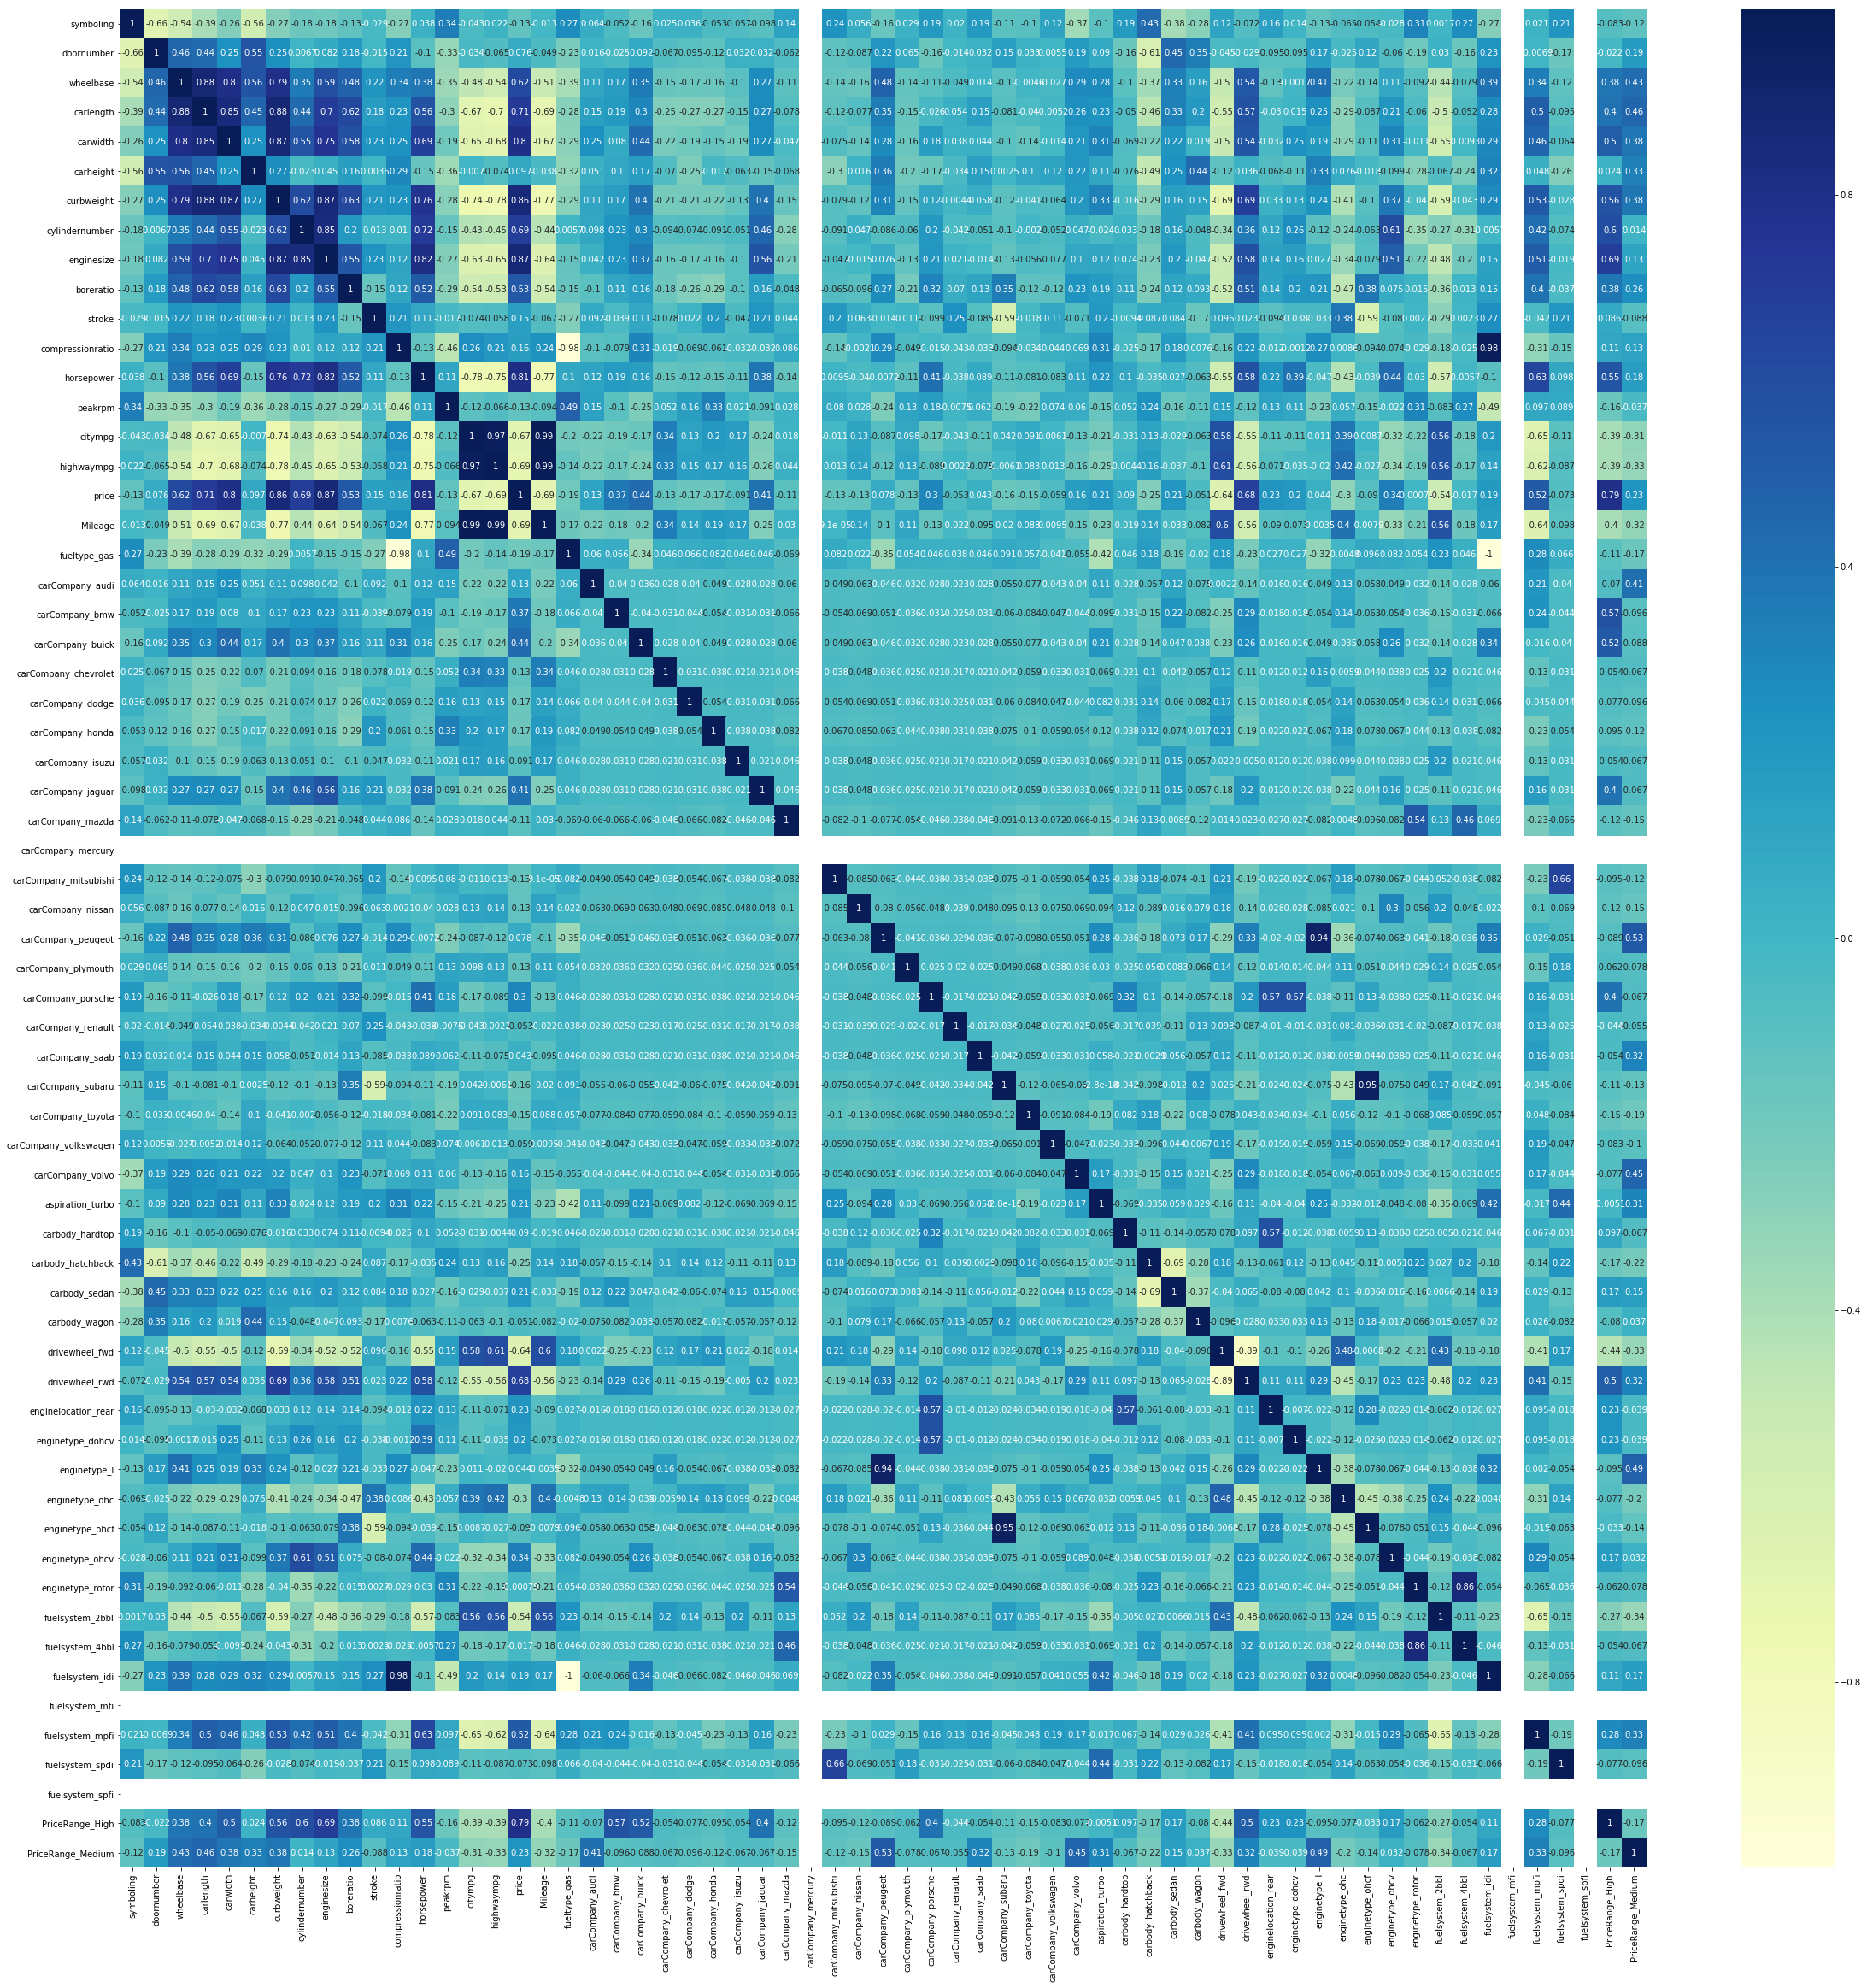

In [56]:
# Correlation check
plt.figure(figsize = (40,40))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing train dataframe into X and y datasets

In [57]:
y_train = df_train.pop('price')
X_train = df_train

### Building model

#### RFE

In [58]:
# importing RFE and Linear Regression libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [59]:
# executing RFE with output number of variable to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,20) #executing RFE
rfe = rfe.fit(X_train, y_train)

In [60]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 34),
 ('doornumber', False, 32),
 ('wheelbase', False, 3),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 9),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', False, 13),
 ('peakrpm', True, 1),
 ('citympg', False, 25),
 ('highwaympg', False, 26),
 ('Mileage', False, 5),
 ('fueltype_gas', True, 1),
 ('carCompany_audi', False, 22),
 ('carCompany_bmw', True, 1),
 ('carCompany_buick', False, 23),
 ('carCompany_chevrolet', False, 17),
 ('carCompany_dodge', False, 14),
 ('carCompany_honda', False, 19),
 ('carCompany_isuzu', False, 37),
 ('carCompany_jaguar', False, 18),
 ('carCompany_mazda', False, 27),
 ('carCompany_mercury', False, 41),
 ('carCompany_mitsubishi', False, 10),
 ('carCompany_nissan', False, 31),
 ('carCompany_peugeot', True, 1),
 ('carCompany_plymouth', False, 15),
 ('carCompany_porsche', False, 2),
 ('ca

In [61]:
# columns shortlisted by RFE
col = X_train.columns[rfe.support_]
col

Index(['carlength', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'fueltype_gas',
       'carCompany_bmw', 'carCompany_peugeot', 'carCompany_saab',
       'carCompany_subaru', 'enginelocation_rear', 'enginetype_l',
       'enginetype_ohcf', 'enginetype_rotor', 'fuelsystem_idi',
       'PriceRange_High'],
      dtype='object')

In [62]:
# columns removed by RFE
X_train.columns[~rfe.support_]

Index(['symboling', 'doornumber', 'wheelbase', 'carheight', 'horsepower',
       'citympg', 'highwaympg', 'Mileage', 'carCompany_audi',
       'carCompany_buick', 'carCompany_chevrolet', 'carCompany_dodge',
       'carCompany_honda', 'carCompany_isuzu', 'carCompany_jaguar',
       'carCompany_mazda', 'carCompany_mercury', 'carCompany_mitsubishi',
       'carCompany_nissan', 'carCompany_plymouth', 'carCompany_porsche',
       'carCompany_renault', 'carCompany_toyota', 'carCompany_volkswagen',
       'carCompany_volvo', 'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_ohc',
       'enginetype_ohcv', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'PriceRange_Medium'],
      dtype='object')

#### Model 1 - with RFE selected variables

In [63]:
# Creating X_train_rfe with RFE shortlisted variables
X_train_1 = X_train[col]

In [64]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_1)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.66e-69
Time:                        01:17:06   Log-Likelihood:                 225.57
No. Observations:                 143   AIC:                            -413.1
Df Residuals:                     124   BIC:                            -356.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1166      0.066      1.754      0.082      -0.015       0.248
carlength              -0.1056      0.064     -1.649      0.102      -0.232       0.021
carwidth                0.4197      0.066      6.351      0.000       0.289       0.551
curbweight              0.3220      0.089      3.609      0.000       0.145       0.499
cylindernumber         -0.4306      0.171     -2.515      0.013      -0.769      -0.092
enginesize              0.7771      0.179      4.336      0.000       0.422       1.132
boreratio              -0.1539      0.057     -2.716      0.008      -0.266      -0.042
stroke                 -0.2580      0.058     -4.453      0.000      -0.373      -0.143
compressionratio       -0.2398      0.150     -1.602      0.112      -0.536       0.056
peakrpm                 0.0953      0.032      2.957      0.004       0.032       0.159
fueltype_gas           -0.0704      0.042     -1.692      0.093      -0.153       0.012
carCompany_bmw          0.1554      0.034      4.559      0.000       0.088       0.223
carCompany_peugeot     -0.2349      0.063     -3.707      0.000      -0.360      -0.109
carCompany_saab         0.0557      0.034      1.629      0.106      -0.012       0.123
carCompany_subaru      -0.1401      0.026     -5.409      0.000      -0.191      -0.089
enginelocation_rear     0.2328      0.042      5.580      0.000       0.150       0.315
enginetype_l            0.1358      0.056      2.406      0.018       0.024       0.247
enginetype_ohcf         0.0927      0.023      3.949      0.000       0.046       0.139
enginetype_rotor        0.0642      0.037      1.737      0.085      -0.009       0.137
fuelsystem_idi          0.1870      0.095      1.969      0.051      -0.001       0.375
PriceRange_High         0.1255      0.028      4.425      0.000       0.069       0.182
==============================================================================
Omnibus:                       27.389   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.638
Skew:                           0.758   Prob(JB):                     3.39e-15
Kurtosis:                       5.981   Cond. No.                     7.68e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.3e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [65]:
# Calculating VIFs for the model
vif = pd.DataFrame()
X = X_train_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,enginelocation_rear,inf
16,enginetype_ohcf,inf
13,carCompany_subaru,inf
9,fueltype_gas,148.050000
18,fuelsystem_idi,113.520000
7,compressionratio,62.110000
4,enginesize,37.870000
3,cylindernumber,19.390000
2,curbweight,17.530000
11,carCompany_peugeot,10.530000


`compressionratio` has high p value and can be dropped.

#### Model 2 - dropping `compressionratio`

In [66]:
X_train_2 = X_train_1.drop(['compressionratio'], axis=1)

In [67]:
X_train_lm = sm.add_constant(X_train_2)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     125.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.13e-70
Time:                        01:17:06   Log-Likelihood:                 224.11
No. Observations:                 143   AIC:                            -412.2
Df Residuals:                     125   BIC:                            -358.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0280      0.037      0.754      0.452      -0.045       0.101
carlength              -0.1349      0.062     -2.186      0.031      -0.257      -0.013
carwidth                0.4326      0.066      6.554      0.000       0.302       0.563
curbweight              0.3803      0.082      4.639      0.000       0.218       0.543
cylindernumber         -0.5016      0.166     -3.014      0.003      -0.831      -0.172
enginesize              0.7848      0.180      4.354      0.000       0.428       1.142
boreratio              -0.1660      0.057     -2.936      0.004      -0.278      -0.054
stroke                 -0.2384      0.057     -4.184      0.000      -0.351      -0.126
peakrpm                 0.0922      0.032      2.849      0.005       0.028       0.156
fueltype_gas           -0.0114      0.019     -0.585      0.560      -0.050       0.027
carCompany_bmw          0.1687      0.033      5.068      0.000       0.103       0.235
carCompany_peugeot     -0.2222      0.063     -3.512      0.001      -0.347      -0.097
carCompany_saab         0.0522      0.034      1.521      0.131      -0.016       0.120
carCompany_subaru      -0.1357      0.026     -5.237      0.000      -0.187      -0.084
enginelocation_rear     0.2345      0.042      5.588      0.000       0.151       0.318
enginetype_l            0.1301      0.057      2.297      0.023       0.018       0.242
enginetype_ohcf         0.0988      0.023      4.239      0.000       0.053       0.145
enginetype_rotor        0.0422      0.035      1.222      0.224      -0.026       0.111
fuelsystem_idi          0.0394      0.023      1.700      0.092      -0.006       0.085
PriceRange_High         0.1193      0.028      4.219      0.000       0.063       0.175
==============================================================================
Omnibus:                       26.817   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.052
Skew:                           0.749   Prob(JB):                     1.23e-14
Kurtosis:                       5.917   Cond. No.                     5.26e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.75e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [68]:
# Calculating VIFs for the model
vif = pd.DataFrame()
X = X_train_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,enginelocation_rear,inf
15,enginetype_ohcf,inf
12,carCompany_subaru,inf
8,fueltype_gas,132.620000
4,enginesize,37.840000
3,cylindernumber,18.090000
17,fuelsystem_idi,15.380000
2,curbweight,14.610000
10,carCompany_peugeot,10.360000
14,enginetype_l,9.290000


`fueltype_gas` has high p value and can be dropped

#### Model 3 - dropping `fueltype_gas`

In [69]:
X_train_3 = X_train_2.drop(['fueltype_gas'], axis=1)

In [70]:
X_train_lm = sm.add_constant(X_train_3)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     125.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.13e-70
Time:                        01:17:06   Log-Likelihood:                 224.11
No. Observations:                 143   AIC:                            -412.2
Df Residuals:                     125   BIC:                            -358.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0166      0.055      0.305      0.761      -0.091       0.125
carlength              -0.1349      0.062     -2.186      0.031      -0.257      -0.013
carwidth                0.4326      0.066      6.554      0.000       0.302       0.563
curbweight              0.3803      0.082      4.639      0.000       0.218       0.543
cylindernumber         -0.5016      0.166     -3.014      0.003      -0.831      -0.172
enginesize              0.7848      0.180      4.354      0.000       0.428       1.142
boreratio              -0.1660      0.057     -2.936      0.004      -0.278      -0.054
stroke                 -0.2384      0.057     -4.184      0.000      -0.351      -0.126
peakrpm                 0.0922      0.032      2.849      0.005       0.028       0.156
carCompany_bmw          0.1687      0.033      5.068      0.000       0.103       0.235
carCompany_peugeot     -0.2222      0.063     -3.512      0.001      -0.347      -0.097
carCompany_saab         0.0522      0.034      1.521      0.131      -0.016       0.120
carCompany_subaru      -0.1357      0.026     -5.237      0.000      -0.187      -0.084
enginelocation_rear     0.2345      0.042      5.588      0.000       0.151       0.318
enginetype_l            0.1301      0.057      2.297      0.023       0.018       0.242
enginetype_ohcf         0.0988      0.023      4.239      0.000       0.053       0.145
enginetype_rotor        0.0422      0.035      1.222      0.224      -0.026       0.111
fuelsystem_idi          0.0507      0.021      2.393      0.018       0.009       0.093
PriceRange_High         0.1193      0.028      4.219      0.000       0.063       0.175
==============================================================================
Omnibus:                       26.817   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.052
Skew:                           0.749   Prob(JB):                     1.23e-14
Kurtosis:                       5.917   Cond. No.                     6.06e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.01e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [71]:
# Calculating VIFs for the model
vif = pd.DataFrame()
X = X_train_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,carCompany_subaru,inf
14,enginetype_ohcf,inf
12,enginelocation_rear,inf
2,curbweight,68.000000
4,enginesize,60.880000
0,carlength,56.410000
1,carwidth,48.250000
3,cylindernumber,29.560000
5,boreratio,22.060000
6,stroke,14.150000


`enginetype_rotor` high p-value and can be dropped

#### Model 4 - dropping `enginetype_rotor`

In [72]:
X_train_4 = X_train_3.drop(['enginetype_rotor'], axis=1)

In [73]:
X_train_lm = sm.add_constant(X_train_4)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     133.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           9.12e-71
Time:                        01:17:07   Log-Likelihood:                 223.26
No. Observations:                 143   AIC:                            -412.5
Df Residuals:                     126   BIC:                            -362.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0297      0.054      0.554      0.581      -0.076       0.136
carlength              -0.1470      0.061     -2.407      0.018      -0.268      -0.026
carwidth                0.4446      0.065      6.799      0.000       0.315       0.574
curbweight              0.4005      0.080      4.977      0.000       0.241       0.560
cylindernumber         -0.5654      0.158     -3.571      0.001      -0.879      -0.252
enginesize              0.8021      0.180      4.455      0.000       0.446       1.158
boreratio              -0.1735      0.056     -3.083      0.003      -0.285      -0.062
stroke                 -0.2526      0.056     -4.520      0.000      -0.363      -0.142
peakrpm                 0.1015      0.032      3.218      0.002       0.039       0.164
carCompany_bmw          0.1707      0.033      5.124      0.000       0.105       0.237
carCompany_peugeot     -0.2256      0.063     -3.563      0.001      -0.351      -0.100
carCompany_saab         0.0478      0.034      1.398      0.165      -0.020       0.116
carCompany_subaru      -0.1370      0.026     -5.283      0.000      -0.188      -0.086
enginelocation_rear     0.2345      0.042      5.576      0.000       0.151       0.318
enginetype_l            0.1273      0.057      2.244      0.027       0.015       0.240
enginetype_ohcf         0.0974      0.023      4.176      0.000       0.051       0.144
fuelsystem_idi          0.0511      0.021      2.407      0.018       0.009       0.093
PriceRange_High         0.1201      0.028      4.243      0.000       0.064       0.176
==============================================================================
Omnibus:                       23.476   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.424
Skew:                           0.665   Prob(JB):                     2.51e-12
Kurtosis:                       5.682   Cond. No.                     5.85e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.08e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [74]:
# Calculating VIFs for the model
vif = pd.DataFrame()
X = X_train_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,enginetype_ohcf,inf
11,carCompany_subaru,inf
12,enginelocation_rear,inf
2,curbweight,64.190000
4,enginesize,60.320000
0,carlength,55.580000
1,carwidth,47.780000
3,cylindernumber,27.280000
5,boreratio,22.010000
6,stroke,14.080000


`carCompany_saab` has high p value and can be dropped

#### Model 5 - dropping `carCompany_saab`

In [75]:
X_train_5 = X_train_4.drop(['carCompany_saab'], axis=1)

In [76]:
X_train_lm = sm.add_constant(X_train_5)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     140.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.98e-71
Time:                        01:17:07   Log-Likelihood:                 222.16
No. Observations:                 143   AIC:                            -412.3
Df Residuals:                     127   BIC:                            -364.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0244      0.054      0.455      0.650      -0.082       0.131
carlength              -0.1293      0.060     -2.157      0.033      -0.248      -0.011
carwidth                0.4338      0.065      6.655      0.000       0.305       0.563
curbweight              0.4013      0.081      4.968      0.000       0.241       0.561
cylindernumber         -0.5501      0.159     -3.469      0.001      -0.864      -0.236
enginesize              0.7776      0.180      4.323      0.000       0.422       1.134
boreratio              -0.1608      0.056     -2.884      0.005      -0.271      -0.050
stroke                 -0.2571      0.056     -4.590      0.000      -0.368      -0.146
peakrpm                 0.1039      0.032      3.288      0.001       0.041       0.166
carCompany_bmw          0.1671      0.033      5.013      0.000       0.101       0.233
carCompany_peugeot     -0.2338      0.063     -3.696      0.000      -0.359      -0.109
carCompany_subaru      -0.1406      0.026     -5.426      0.000      -0.192      -0.089
enginelocation_rear     0.2346      0.042      5.558      0.000       0.151       0.318
enginetype_l            0.1297      0.057      2.278      0.024       0.017       0.242
enginetype_ohcf         0.0940      0.023      4.036      0.000       0.048       0.140
fuelsystem_idi          0.0513      0.021      2.406      0.018       0.009       0.093
PriceRange_High         0.1199      0.028      4.219      0.000       0.064       0.176
==============================================================================
Omnibus:                       22.897   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.188
Skew:                           0.646   Prob(JB):                     4.65e-12
Kurtosis:                       5.662   Cond. No.                     6.47e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.82e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [77]:
# Calculating VIFs for the model
vif = pd.DataFrame()
X = X_train_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,carCompany_subaru,inf
11,enginelocation_rear,inf
13,enginetype_ohcf,inf
2,curbweight,64.180000
4,enginesize,60.040000
0,carlength,53.410000
1,carwidth,47.280000
3,cylindernumber,27.270000
5,boreratio,21.450000
6,stroke,13.430000


`carCompany_subaru` has VIF and can be dropped

#### Model 6 - dropping `carCompany_subaru`

In [78]:
X_train_6 = X_train_5.drop(['carCompany_subaru'], axis=1)

In [79]:
X_train_lm = sm.add_constant(X_train_6)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     140.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.98e-71
Time:                        01:17:07   Log-Likelihood:                 222.16
No. Observations:                 143   AIC:                            -412.3
Df Residuals:                     127   BIC:                            -364.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0244      0.054      0.455      0.650      -0.082       0.131
carlength              -0.1293      0.060     -2.157      0.033      -0.248      -0.011
carwidth                0.4338      0.065      6.655      0.000       0.305       0.563
curbweight              0.4013      0.081      4.968      0.000       0.241       0.561
cylindernumber         -0.5501      0.159     -3.469      0.001      -0.864      -0.236
enginesize              0.7776      0.180      4.323      0.000       0.422       1.134
boreratio              -0.1608      0.056     -2.884      0.005      -0.271      -0.050
stroke                 -0.2571      0.056     -4.590      0.000      -0.368      -0.146
peakrpm                 0.1039      0.032      3.288      0.001       0.041       0.166
carCompany_bmw          0.1671      0.033      5.013      0.000       0.101       0.233
carCompany_peugeot     -0.2338      0.063     -3.696      0.000      -0.359      -0.109
enginelocation_rear     0.3752      0.066      5.680      0.000       0.244       0.506
enginetype_l            0.1297      0.057      2.278      0.024       0.017       0.242
enginetype_ohcf        -0.0466      0.025     -1.834      0.069      -0.097       0.004
fuelsystem_idi          0.0513      0.021      2.406      0.018       0.009       0.093
PriceRange_High         0.1199      0.028      4.219      0.000       0.064       0.176
==============================================================================
Omnibus:                       22.897   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.188
Skew:                           0.646   Prob(JB):                     4.65e-12
Kurtosis:                       5.662   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# Calculating VIFs for the model
vif = pd.DataFrame()
X = X_train_6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,64.18
4,enginesize,60.04
0,carlength,53.41
1,carwidth,47.28
3,cylindernumber,27.27
5,boreratio,21.45
6,stroke,13.43
9,carCompany_peugeot,10.68
11,enginetype_l,9.58
7,peakrpm,8.99


`enginetype_ohcf` has high p value and can be dropped

#### Model 7 - dropping `enginetype_ohcf`

In [81]:
X_train_7 = X_train_6.drop(['enginetype_ohcf'], axis=1)

In [82]:
X_train_lm = sm.add_constant(X_train_7)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     148.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           8.28e-72
Time:                        01:17:07   Log-Likelihood:                 220.29
No. Observations:                 143   AIC:                            -410.6
Df Residuals:                     128   BIC:                            -366.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0062      0.053      0.116      0.908      -0.099       0.111
carlength              -0.1165      0.060     -1.939      0.055      -0.235       0.002
carwidth                0.4277      0.066      6.511      0.000       0.298       0.558
curbweight              0.4021      0.082      4.933      0.000       0.241       0.563
cylindernumber         -0.5650      0.160     -3.536      0.001      -0.881      -0.249
enginesize              0.8018      0.181      4.429      0.000       0.444       1.160
boreratio              -0.1943      0.053     -3.655      0.000      -0.300      -0.089
stroke                 -0.2240      0.054     -4.186      0.000      -0.330      -0.118
peakrpm                 0.1180      0.031      3.814      0.000       0.057       0.179
carCompany_bmw          0.1687      0.034      5.015      0.000       0.102       0.235
carCompany_peugeot     -0.2290      0.064     -3.589      0.000      -0.355      -0.103
enginelocation_rear     0.3379      0.063      5.328      0.000       0.212       0.463
enginetype_l            0.1360      0.057      2.372      0.019       0.023       0.249
fuelsystem_idi          0.0518      0.022      2.407      0.017       0.009       0.094
PriceRange_High         0.1250      0.029      4.382      0.000       0.069       0.182
==============================================================================
Omnibus:                       21.892   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.015
Skew:                           0.705   Prob(JB):                     2.05e-09
Kurtosis:                       5.174   Cond. No.                         87.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
# Calculating VIFs for the model
vif = pd.DataFrame()
X = X_train_7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,64.12
4,enginesize,54.24
0,carlength,53.03
1,carwidth,47.28
3,cylindernumber,23.49
6,stroke,12.09
5,boreratio,11.85
9,carCompany_peugeot,10.63
11,enginetype_l,9.57
7,peakrpm,8.61


`carlength` has high p value and can be dropped

#### Model 8 - dropping `carlength`

In [84]:
X_train_8 = X_train_7.drop(['carlength'], axis=1)

In [85]:
X_train_lm = sm.add_constant(X_train_8)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

lr_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     155.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.09e-72
Time:                        01:17:07   Log-Likelihood:                 218.22
No. Observations:                 143   AIC:                            -408.4
Df Residuals:                     129   BIC:                            -367.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0115      0.053     -0.217      0.829      -0.116       0.093
carwidth                0.3726      0.060      6.226      0.000       0.254       0.491
curbweight              0.3268      0.072      4.512      0.000       0.184       0.470
cylindernumber         -0.5385      0.161     -3.347      0.001      -0.857      -0.220
enginesize              0.8003      0.183      4.374      0.000       0.438       1.162
boreratio              -0.1969      0.054     -3.666      0.000      -0.303      -0.091
stroke                 -0.2213      0.054     -4.094      0.000      -0.328      -0.114
peakrpm                 0.1300      0.031      4.243      0.000       0.069       0.191
carCompany_bmw          0.1437      0.031      4.576      0.000       0.082       0.206
carCompany_peugeot     -0.2365      0.064     -3.674      0.000      -0.364      -0.109
enginelocation_rear     0.3249      0.064      5.098      0.000       0.199       0.451
enginetype_l            0.1457      0.058      2.524      0.013       0.032       0.260
fuelsystem_idi          0.0551      0.022      2.542      0.012       0.012       0.098
PriceRange_High         0.1445      0.027      5.349      0.000       0.091       0.198
==============================================================================
Omnibus:                       20.218   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.928
Skew:                           0.662   Prob(JB):                     1.58e-08
Kurtosis:                       5.068   Cond. No.                         82.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
# Calculating VIFs for the model
vif = pd.DataFrame()
X = X_train_8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,enginesize,52.16
1,curbweight,46.28
0,carwidth,39.39
2,cylindernumber,23.17
5,stroke,11.47
4,boreratio,10.72
8,carCompany_peugeot,10.61
10,enginetype_l,9.53
6,peakrpm,8.36
12,PriceRange_High,4.04


`enginesize` has high VIF and can be dropped

#### Model 9 - dropping `enginesize`

In [87]:
X_train_9 = X_train_8.drop(['enginesize'], axis=1)

In [88]:
X_train_lm = sm.add_constant(X_train_9)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

lr_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     146.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.35e-69
Time:                        01:17:07   Log-Likelihood:                 208.33
No. Observations:                 143   AIC:                            -390.7
Df Residuals:                     130   BIC:                            -352.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1899      0.036     -5.258      0.000      -0.261      -0.118
carwidth                0.2979      0.061      4.866      0.000       0.177       0.419
curbweight              0.5231      0.061      8.617      0.000       0.403       0.643
cylindernumber          0.0985      0.073      1.349      0.180      -0.046       0.243
boreratio              -0.0267      0.040     -0.676      0.500      -0.105       0.051
stroke                 -0.0444      0.038     -1.159      0.249      -0.120       0.031
peakrpm                 0.1095      0.032      3.388      0.001       0.046       0.173
carCompany_bmw          0.1264      0.033      3.800      0.000       0.061       0.192
carCompany_peugeot     -0.2566      0.069     -3.744      0.000      -0.392      -0.121
enginelocation_rear     0.3602      0.067      5.336      0.000       0.227       0.494
enginetype_l            0.1622      0.061      2.638      0.009       0.041       0.284
fuelsystem_idi          0.0368      0.023      1.623      0.107      -0.008       0.082
PriceRange_High         0.1752      0.028      6.294      0.000       0.120       0.230
==============================================================================
Omnibus:                       30.501   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.431
Skew:                           0.814   Prob(JB):                     2.08e-18
Kurtosis:                       6.319   Cond. No.                         27.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
# Calculating VIFs for the model
vif = pd.DataFrame()
X = X_train_9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,37.87
1,curbweight,28.63
4,stroke,10.61
7,carCompany_peugeot,10.59
2,cylindernumber,10.27
3,boreratio,10.27
9,enginetype_l,9.46
5,peakrpm,6.47
11,PriceRange_High,3.27
10,fuelsystem_idi,1.84


`boreratio` has high p value and can be dropped

#### Model 10 - dropping `boreratio`

In [90]:
X_train_10 = X_train_9.drop(['boreratio'], axis=1)

In [91]:
X_train_lm = sm.add_constant(X_train_10)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

lr_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     160.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.27e-70
Time:                        01:17:07   Log-Likelihood:                 208.08
No. Observations:                 143   AIC:                            -392.2
Df Residuals:                     131   BIC:                            -356.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2062      0.027     -7.698      0.000      -0.259      -0.153
carwidth                0.2880      0.059      4.855      0.000       0.171       0.405
curbweight              0.5069      0.056      9.107      0.000       0.397       0.617
cylindernumber          0.1225      0.064      1.921      0.057      -0.004       0.249
stroke                 -0.0331      0.034     -0.962      0.338      -0.101       0.035
peakrpm                 0.1155      0.031      3.725      0.000       0.054       0.177
carCompany_bmw          0.1274      0.033      3.844      0.000       0.062       0.193
carCompany_peugeot     -0.2574      0.068     -3.764      0.000      -0.393      -0.122
enginelocation_rear     0.3507      0.066      5.323      0.000       0.220       0.481
enginetype_l            0.1641      0.061      2.678      0.008       0.043       0.285
fuelsystem_idi          0.0396      0.022      1.776      0.078      -0.005       0.084
PriceRange_High         0.1725      0.027      6.274      0.000       0.118       0.227
==============================================================================
Omnibus:                       28.489   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.405
Skew:                           0.785   Prob(JB):                     5.15e-16
Kurtosis:                       6.058   Cond. No.                         26.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
# Calculating VIFs for the model
vif = pd.DataFrame()
X = X_train_10
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,33.63
1,curbweight,26.67
3,stroke,10.61
6,carCompany_peugeot,10.51
2,cylindernumber,10.02
8,enginetype_l,9.38
4,peakrpm,6.43
10,PriceRange_High,3.20
9,fuelsystem_idi,1.84
5,carCompany_bmw,1.76


`stroke` has high p value and can be dropped

#### Model 11 - dropping `stroke`

In [93]:
X_train_11 = X_train_10.drop(['stroke'], axis=1)

In [94]:
X_train_lm = sm.add_constant(X_train_11)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

lr_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     176.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.63e-71
Time:                        01:17:07   Log-Likelihood:                 207.58
No. Observations:                 143   AIC:                            -393.2
Df Residuals:                     132   BIC:                            -360.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2203      0.022     -9.815      0.000      -0.265      -0.176
carwidth                0.2851      0.059      4.813      0.000       0.168       0.402
curbweight              0.5009      0.055      9.058      0.000       0.392       0.610
cylindernumber          0.1307      0.063      2.071      0.040       0.006       0.256
peakrpm                 0.1114      0.031      3.629      0.000       0.051       0.172
carCompany_bmw          0.1284      0.033      3.876      0.000       0.063       0.194
carCompany_peugeot     -0.2536      0.068     -3.716      0.000      -0.389      -0.119
enginelocation_rear     0.3570      0.066      5.448      0.000       0.227       0.487
enginetype_l            0.1649      0.061      2.692      0.008       0.044       0.286
fuelsystem_idi          0.0342      0.022      1.585      0.115      -0.008       0.077
PriceRange_High         0.1721      0.027      6.261      0.000       0.118       0.226
==============================================================================
Omnibus:                       28.613   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.205
Skew:                           0.809   Prob(JB):                     2.55e-15
Kurtosis:                       5.942   Cond. No.                         24.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
# Calculating VIFs for the model
vif = pd.DataFrame()
X = X_train_11
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,31.92
1,curbweight,26.47
5,carCompany_peugeot,10.22
2,cylindernumber,9.90
7,enginetype_l,9.28
3,peakrpm,4.93
9,PriceRange_High,3.03
4,carCompany_bmw,1.73
8,fuelsystem_idi,1.58
6,enginelocation_rear,1.23


`fuelsystem_idi` has high p value and can be dropped

#### Model 12 - dropping `fuelsystem_idi`

In [96]:
X_train_12 = X_train_11.drop(['fuelsystem_idi'], axis=1)

In [97]:
X_train_lm = sm.add_constant(X_train_12)

lr_12 = sm.OLS(y_train, X_train_lm).fit()

lr_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     193.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.31e-72
Time:                        01:17:07   Log-Likelihood:                 206.23
No. Observations:                 143   AIC:                            -392.5
Df Residuals:                     133   BIC:                            -362.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2097      0.022     -9.733      0.000      -0.252      -0.167
carwidth                0.2978      0.059      5.047      0.000       0.181       0.415
curbweight              0.5006      0.056      9.003      0.000       0.391       0.611
cylindernumber          0.1087      0.062      1.755      0.082      -0.014       0.231
peakrpm                 0.0897      0.028      3.247      0.001       0.035       0.144
carCompany_bmw          0.1204      0.033      3.657      0.000       0.055       0.186
carCompany_peugeot     -0.2467      0.068     -3.602      0.000      -0.382      -0.111
enginelocation_rear     0.3605      0.066      5.473      0.000       0.230       0.491
enginetype_l            0.1649      0.062      2.677      0.008       0.043       0.287
PriceRange_High         0.1775      0.027      6.472      0.000       0.123       0.232
==============================================================================
Omnibus:                       30.733   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.356
Skew:                           0.861   Prob(JB):                     7.14e-17
Kurtosis:                       6.085   Cond. No.                         24.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
# Calculating VIFs for the model
vif = pd.DataFrame()
X = X_train_12
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,29.82
1,curbweight,26.47
5,carCompany_peugeot,10.22
2,cylindernumber,9.76
7,enginetype_l,9.24
3,peakrpm,4.32
8,PriceRange_High,3.03
4,carCompany_bmw,1.72
6,enginelocation_rear,1.23


`cylindernumber` has high p value and can be dropped

#### Model 13 - dropping `cylindernumber`

In [99]:
X_train_13 = X_train_12.drop(['cylindernumber'], axis=1)

In [100]:
X_train_lm = sm.add_constant(X_train_13)

lr_13 = sm.OLS(y_train, X_train_lm).fit()

lr_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     214.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.90e-72
Time:                        01:17:08   Log-Likelihood:                 204.59
No. Observations:                 143   AIC:                            -391.2
Df Residuals:                     134   BIC:                            -364.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1965      0.020     -9.653      0.000      -0.237      -0.156
carwidth                0.3015      0.059      5.072      0.000       0.184       0.419
curbweight              0.5285      0.054      9.838      0.000       0.422       0.635
peakrpm                 0.0882      0.028      3.170      0.002       0.033       0.143
carCompany_bmw          0.1179      0.033      3.557      0.001       0.052       0.184
carCompany_peugeot     -0.2574      0.069     -3.744      0.000      -0.393      -0.121
enginelocation_rear     0.3650      0.066      5.504      0.000       0.234       0.496
enginetype_l            0.1633      0.062      2.630      0.010       0.040       0.286
PriceRange_High         0.1893      0.027      7.065      0.000       0.136       0.242
==============================================================================
Omnibus:                       26.208   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.485
Skew:                           0.744   Prob(JB):                     7.34e-14
Kurtosis:                       5.817   Cond. No.                         23.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
# Calculating VIFs for the model
vif = pd.DataFrame()
X = X_train_13
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,28.70
1,curbweight,24.12
4,carCompany_peugeot,9.91
6,enginetype_l,9.20
2,peakrpm,4.14
7,PriceRange_High,2.99
3,carCompany_bmw,1.71
5,enginelocation_rear,1.22


`carwidth` has high VIF and can be dropped

#### Model 14 - dropping `carwidth`

In [102]:
X_train_14 = X_train_13.drop(['carwidth'], axis=1)

In [103]:
X_train_lm = sm.add_constant(X_train_14)

lr_14 = sm.OLS(y_train, X_train_lm).fit()

lr_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     203.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.58e-68
Time:                        01:17:08   Log-Likelihood:                 192.03
No. Observations:                 143   AIC:                            -368.1
Df Residuals:                     135   BIC:                            -344.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1530      0.020     -7.618      0.000      -0.193      -0.113
curbweight              0.7378      0.037     19.729      0.000       0.664       0.812
peakrpm                 0.1094      0.030      3.656      0.000       0.050       0.169
carCompany_bmw          0.0786      0.035      2.243      0.027       0.009       0.148
carCompany_peugeot     -0.1919      0.073     -2.612      0.010      -0.337      -0.047
enginelocation_rear     0.2919      0.070      4.146      0.000       0.153       0.431
enginetype_l            0.1115      0.067      1.674      0.096      -0.020       0.243
PriceRange_High         0.2187      0.028      7.690      0.000       0.162       0.275
==============================================================================
Omnibus:                       14.821   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               42.991
Skew:                           0.233   Prob(JB):                     4.62e-10
Kurtosis:                       5.645   Cond. No.                         21.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
# Calculating VIFs for the model
vif = pd.DataFrame()
X = X_train_14
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,carCompany_peugeot,9.83
5,enginetype_l,9.14
0,curbweight,4.86
1,peakrpm,3.00
6,PriceRange_High,2.97
2,carCompany_bmw,1.68
4,enginelocation_rear,1.17


`enginetype_l` has high p value and can be dropped

#### Model 15 - dropping `enginetype_l`

In [105]:
X_train_15 = X_train_14.drop(['enginetype_l'], axis=1)

In [106]:
X_train_lm = sm.add_constant(X_train_15)

lr_15 = sm.OLS(y_train, X_train_lm).fit()

lr_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     234.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.93e-69
Time:                        01:17:08   Log-Likelihood:                 190.56
No. Observations:                 143   AIC:                            -367.1
Df Residuals:                     136   BIC:                            -346.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1470      0.020     -7.390      0.000      -0.186      -0.108
curbweight              0.7255      0.037     19.655      0.000       0.653       0.798
peakrpm                 0.1074      0.030      3.570      0.000       0.048       0.167
carCompany_bmw          0.0753      0.035      2.138      0.034       0.006       0.145
carCompany_peugeot     -0.0777      0.027     -2.836      0.005      -0.132      -0.024
enginelocation_rear     0.2884      0.071      4.071      0.000       0.148       0.429
PriceRange_High         0.2237      0.028      7.855      0.000       0.167       0.280
==============================================================================
Omnibus:                       14.858   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               39.457
Skew:                           0.290   Prob(JB):                     2.70e-09
Kurtosis:                       5.507   Cond. No.                         15.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
# Calculating VIFs for the model
vif = pd.DataFrame()
X = X_train_15
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,4.81
1,peakrpm,2.96
5,PriceRange_High,2.96
2,carCompany_bmw,1.68
3,carCompany_peugeot,1.39
4,enginelocation_rear,1.17


### <font color=blue>Model 15 is good model with R2 as 91.2%</font>

### <font color=blue>Trying to create further model by removing curbweight which has less 5% VIF but still in higher range.</font>

#### Model 16 - dropping `curbweight`

In [108]:
X_train_16 = X_train_15.drop(['curbweight'], axis=1)

In [109]:
X_train_lm = sm.add_constant(X_train_16)

lr_16 = sm.OLS(y_train, X_train_lm).fit()

lr_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     53.49
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.49e-30
Time:                        01:17:08   Log-Likelihood:                 94.350
No. Observations:                 143   AIC:                            -176.7
Df Residuals:                     137   BIC:                            -158.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1289      0.028      4.682      0.000       0.074       0.183
peakrpm                 0.0447      0.058      0.765      0.446      -0.071       0.160
carCompany_bmw         -0.1201      0.066     -1.820      0.071      -0.251       0.010
carCompany_peugeot      0.1499      0.048      3.094      0.002       0.054       0.246
enginelocation_rear     0.0590      0.136      0.433      0.666      -0.211       0.329
PriceRange_High         0.5789      0.043     13.471      0.000       0.494       0.664
==============================================================================
Omnibus:                       17.934   Durbin-Watson:                   2.199
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.472
Skew:                           0.872   Prob(JB):                     3.59e-05
Kurtosis:                       3.628   Cond. No.                         14.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
# Calculating VIFs for the model
vif = pd.DataFrame()
X = X_train_16
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,PriceRange_High,1.75
1,carCompany_bmw,1.60
3,enginelocation_rear,1.11
0,peakrpm,1.08
2,carCompany_peugeot,1.01


### <font color=blue>R2 dropped to 66.1%, so adding curbweight back</font>

### <font color=blue>We will drop carCompany_bmw which has more than 3% p-value and see whether it makes any difference</font>

#### Model 17 - dropping `carCompany_bmw`

In [111]:
X_train_17 = X_train_15.drop(['carCompany_bmw'], axis=1)

In [112]:
X_train_lm = sm.add_constant(X_train_17)

lr_17 = sm.OLS(y_train, X_train_lm).fit()

lr_17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     273.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.12e-69
Time:                        01:17:08   Log-Likelihood:                 188.20
No. Observations:                 143   AIC:                            -364.4
Df Residuals:                     137   BIC:                            -346.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1391      0.020     -7.026      0.000      -0.178      -0.100
curbweight              0.7032      0.036     19.606      0.000       0.632       0.774
peakrpm                 0.1068      0.030      3.506      0.001       0.047       0.167
carCompany_peugeot     -0.0704      0.028     -2.557      0.012      -0.125      -0.016
enginelocation_rear     0.2548      0.070      3.642      0.000       0.116       0.393
PriceRange_High         0.2608      0.023     11.401      0.000       0.216       0.306
==============================================================================
Omnibus:                       29.740   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.628
Skew:                           0.709   Prob(JB):                     6.32e-22
Kurtosis:                       6.791   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
# Calculating VIFs for the model
vif = pd.DataFrame()
X = X_train_17
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,4.58
1,peakrpm,2.86
4,PriceRange_High,1.93
2,carCompany_peugeot,1.37
3,enginelocation_rear,1.11


### <font color=blue>Model 17 is also a good model with R2 as 90.9% as comapred to Model 15 with R2 as 91.2%</font>
### <font color=blue>Model 17 didn't affect VIF as compared to Model 15</font>

### <font color=blue>Trying to create further model by removing peakrpm which has more than 2% VIF but still in higher range.</font>

#### Model 18 - dropping `peakrpm`

In [114]:
X_train_18 = X_train_17.drop(['peakrpm'], axis=1)

In [115]:
X_train_lm = sm.add_constant(X_train_18)

lr_18 = sm.OLS(y_train, X_train_lm).fit()

lr_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     312.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.00e-68
Time:                        01:17:08   Log-Likelihood:                 182.06
No. Observations:                 143   AIC:                            -354.1
Df Residuals:                     138   BIC:                            -339.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0889      0.014     -6.249      0.000      -0.117      -0.061
curbweight              0.6896      0.037     18.594      0.000       0.616       0.763
carCompany_peugeot     -0.0895      0.028     -3.192      0.002      -0.145      -0.034
enginelocation_rear     0.2970      0.072      4.143      0.000       0.155       0.439
PriceRange_High         0.2514      0.024     10.639      0.000       0.205       0.298
==============================================================================
Omnibus:                       33.766   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.625
Skew:                           0.790   Prob(JB):                     3.89e-27
Kurtosis:                       7.233   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
# Calculating VIFs for the model
vif = pd.DataFrame()
X = X_train_18
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,1.73
3,PriceRange_High,1.60
1,carCompany_peugeot,1.21
2,enginelocation_rear,1.07


### <font color=blue>Model 18 is also a good model with R2 as 90.1% as comapred to Model 15 with R2 as 91.2% and Model 17 with R2 as 90.9%</font>
### <font color=blue>Model 18 has VIF for all variables below 2% which makes it a favourable model</font>

## Residual Analysis of the train data

In [117]:
y_train_price = lr_18.predict(X_train_lm)

Text(0.5, 0, 'Errors')

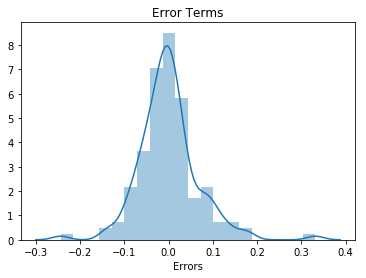

In [118]:
plt.figure()
sns.distplot((y_train - y_train_price),bins = 20)
plt.title('Error Terms')
plt.xlabel('Errors')

In [119]:
Y_train = lr_18.predict(X_train_lm)

#### R2 score for train dataset using Model 18

In [120]:
from sklearn.metrics import r2_score
r2_score(y_train, Y_train)

0.9006606735088241

## Making Predictions Using the Final Model 

#### Applying scaling to test dataset

In [121]:
numeric_vars = ['symboling','doornumber','wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price','Mileage']

df_test[numeric_vars] = scaler.fit_transform(df_test[numeric_vars])

In [122]:
df_test.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,PriceRange_High,PriceRange_Medium
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.583871,0.564516,0.370121,0.486741,0.375212,0.454249,0.371743,0.080645,0.228835,0.667691,...,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129,0.112903,0.225806
std,0.271724,0.499868,0.179970,0.183964,0.208977,0.234487,0.222354,0.220721,0.188416,0.228484,...,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000,0.319058,0.421526
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,0.265306,0.389764,0.221053,0.264423,0.219125,0.000000,0.126638,0.515873,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,1.000000,0.327988,0.475591,0.326316,0.485577,0.344065,0.000000,0.183406,0.674603,...,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
75%,0.800000,1.000000,0.482507,0.642126,0.421053,0.605769,0.540726,0.000000,0.287118,0.857143,...,0.0,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Splitting test dataset in X and y dataset

In [123]:
y_test = df_test.pop('price')
X_test = df_test

In [124]:
X_train_lm.columns

Index(['const', 'curbweight', 'carCompany_peugeot', 'enginelocation_rear',
       'PriceRange_High'],
      dtype='object')

In [125]:
# X test only to have columns in Model 18
X_test_lm = X_test[X_train_18.columns]

# adding constant
X_test_lm = sm.add_constant(X_test_lm)

In [126]:
# making prediction using Model 18
y_pred = lr_18.predict(X_test_lm)

### Model Evaluation

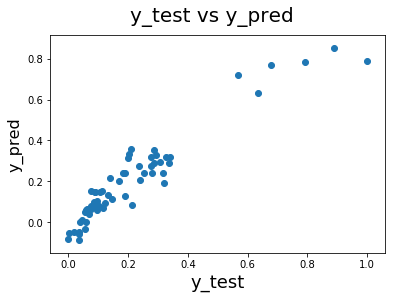

In [127]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

plt.show()

#### R2 score for test dataset using Model 18

In [128]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8956876436800819

## Inference

### Train Dataset
#### R2 score - 90.1%
#### Adj. R2 - 89.8%
### Test Dataset
#### R2 score - 89.6%

#### The equation for best fitted line is 
##### Price = -0.0889 + 0.6896 x curbweight -0.0895 x carCompany_peugeot + 0.2970 x enginelocation_rear + 0.2514 x PriceRange_High
    Price will increase if,
        1. curbweight increases
        2. Car which belongs to enginelocation - rear 
        3. Car belongs to PriceRange - high
    Price will decrease if,
        1. Car belongs to company - peugeot

#### Based on EDA following are observations
    1. Toyota is most favoured car by customers
    2. Customers choice is with gas car as compared to diesel
    3. Aspiration preferred is std over turbo
    4. Car body preferred is sedan followed by hatchback
    5. Drivewheel preferred is fwd
    6. Enginelocation preferred is front
    7. Enginetype preferred is ohc
    8. Number of Cylinder preferred is four
    9. Fuel system preferred is mpfi followed by 2bbl
    10. Budget cars are most preferred by customers